In [3310]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3311]:
pd.set_option('display.max_rows', None)

# **Data Understanding**

Terdapat 2 jenis dataset yaitu:
- **NYC TLC Trip record (csv)** : data mentah yang merekam perjalanan taksi di New York City pada bulan Januari 2023.
- **Taxi zone lookup (csv)** : data ini mencakup nama wilayah dan zona yang terkait dengan setiap ID lokasi

Berikut ini, data spesifik untuk data set NYC TLC Trip record, yang mencakup:
- **VendorID** : Kode yang menunjukkan penyedia LPEP yang menyediakan record.<br>
1 = Creative Mobile Technologies, LLC. 2 = VeriFone Inc
- **lpep_pickup_datetime** : Tanggal dan waktu saat alat meter diaktifkan.
- **lpep_dropoff_datetime** : Tanggal dan waktu ketika alat meter dilepas.
- **passenger_count** : Jumlah penumpang di dalam kendaraan. Ini adalah nilai yang dimasukkan pengemudi.
- **trip_distance** : Jarak perjalanan yang ditempuh dalam **mil** dilaporkan oleh taksimeter.
- **PULocationID** : Zona Taksi TLC tempat argometer dipasang.
- **DOLocationID** : Zona Taksi TLC tempat argometer dimatikan.
- **RateCodeID** : Kode tarif akhir berlaku di akhir perjalanan.<br>
1=Standard rate; 2=JFK; 3=Newark; 4=Nassau or Westchester; 5=Negotiated fare; 6=Group ride
- **store_and_fwd_flag** : menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor, alias "store and forward" karena kendaraan tidak memiliki koneksi ke server. <br>
Y = store and forward trip; N = not a store and forward trip
- **payment_type** : Kode numerik yang menunjukkan bagaimana penumpang membayar biaya perjalanan.<br>
1 = Credit card – Pembayaran dilakukan menggunakan kartu kredit.;
2 = Cash – Pembayaran dilakukan dengan uang tunai.;
3 = No charge  – Perjalanan ini tidak dikenakan biaya, bisa jadi karena merupakan perjalanan gratis atau kondisi lainnya;
4 = Dispute – Biaya perjalanan sedang diperselisihkan, biasanya terkait dengan masalah layanan atau pembayaran.;
5 = Unknown - Metode pembayaran atau status perjalanan tidak diketahui atau tidak tercatat;
6 = Voided trip - Perjalanan dibatalkan dan tidak ada biaya yang dikenakan.
- **fare_amount** : Tarif waktu dan jarak dihitung berdasarkan argo (Extra Miscellaneous extras and surcharges).Saat ini, biaya tambahan hanya berlaku untuk jam sibuk dan biaya menginap sebesar **$0,50 dan $1**.
- **extra** : Biaya tambahan. Saat ini, biaya tambahan yang dikenakan **hanya 0,5 dolar dan 1 dolar untuk jam sibuk dan larut malam.**
- **mta_tax** : Pajak MTA sebesar **$0,50** yang dipicu secara otomatis berdasarkan tarif terukur yang digunakan
- **improvement_surcharge** : Biaya perbaikan sebesar **$0,30** dibebankan pada perjalanan yang diberangkatkan pada saat flag drop. Biaya perbaikan mulai dikenakan pada tahun 2015.
- **tip_amount** : Kolom ini otomatis terisi untuk tip kartu kredit. **Tip tunai tidak termasuk.**
- **tolls_amount** : Jumlah total semua tol yang dibayarkan dalam perjalanan.
- **total_amount** : Jumlah total yang dibebankan kepada penumpang. **Tidak termasuk tip berupa uang tunai.**
- **trip_type** : Kode yang menunjukkan apakah perjalanan tersebut merupakan perjalanan street-hail atau dispatch, yang ditetapkan secara otomatis berdasarkan tarif argo yang digunakan, tetapi dapat diubah oleh pengemudi.<br>
1 = Street-hail (istilah yang digunakan untuk menggambarkan proses memanggil taksi langsung di jalan, tanpa menggunakan aplikasi atau sistem pemesanan sebelumnya);
2 = Dispatch (proses mengirimkan taksi ke pelanggan. Ketika seseorang memesan taksi, petugas akan memilih taksi yang tersedia dan mengirimkannya ke lokasi pelanggan. Proses ini bisa dilakukan lewat pusat panggilan atau aplikasi pemesanan taksi.)
- **congestion_surcharge** : Biaya kemacetan sebesar **$2,75** untuk **perjalanan taksi kuning dan hijau di southern Manhattan dari 96th Street** Biaya tambahan ini berlaku pada tahun 2019.<br>
Biaya tambahan tergantung pada jenis kendaraan yang digunakan:: 
    - Medallion taxicab: $2.50 per trip 
    - For-hire vehicle: $2.75 per trip 

# **3. Data Cleaning**

### **Load Data Set**

In [3312]:
df = pd.read_csv("NYC TLC Trip Record.csv")
df.head()

C:\Users\Fitri A\AppData\Local\Temp\ipykernel_13012\1610220439.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NYC TLC Trip Record.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [3313]:
df_origin = df.copy()

### **Cek Informasi Data Frame**

In [3314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

### **Identifikasi Missing Value**

In [3315]:
df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

### **Cek Duplikat**

In [3316]:
#cek baris duplikat
df.duplicated().sum()

0

### **Cek Unique Value**

In [3317]:
df["VendorID"].unique()

array([2, 1], dtype=int64)

In [3318]:
df["VendorID"].value_counts()

VendorID
2    58868
1     9343
Name: count, dtype: int64

In [3319]:
df["RatecodeID"].unique()

array([ 1.,  5.,  4.,  3.,  2., 99., nan])

In [3320]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     62103
5.0      1529
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

In [3321]:
df[df['RatecodeID'] == 99.0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,NaN,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,NaN,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,NaN,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,NaN,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,NaN,1.0,25.7,1.0,NaN,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,NaN,1.0,41.7,1.0,NaN,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,NaN,1.0,51.7,1.0,NaN,0.0


In [3322]:
df["PULocationID"].unique()

array([166,  24, 223,  41, 181, 255,  75,  66, 195,  83,  97,   7,  42,
        95, 260, 134, 130, 258, 129, 116,  92,  65,  74,  17, 152, 210,
       112,  69, 243,  82, 179, 168,  80,  25, 145, 264,  33, 226,  52,
       169,  36,  51, 157,  43, 256, 173,  70, 251,  40, 101,  61, 241,
       146, 147, 228, 171, 138,  56, 244, 263, 196,  37, 236, 213,  28,
       117,  14, 188, 177,  29, 262, 250,  72, 216,  22,  20, 139,  55,
       257, 193, 127, 219,   3, 119, 265, 167, 150,  78, 135, 247,  93,
       159,  48,  31,  91,  53, 160,  94,  47, 254, 215,  10,  49, 197,
         9,  59, 123, 198,  89, 136, 252, 189,  76,  21,  67,  73,  38,
       114, 132, 131, 149, 178, 182,  18, 239, 121,  35, 240,  98, 242,
       174,  71, 155, 220,  26,  16,  60, 212, 227, 175,  81, 231, 180,
       122, 153,  27, 183, 208, 194, 225, 206, 102,  39, 185, 230,  62,
        68, 235, 207, 205, 192,  77,  32, 190,  85, 261, 108, 124, 191,
        11, 126, 151, 217, 154, 120, 165, 133, 203, 232, 222, 10

In [3323]:
df[df['PULocationID'] == 263].head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
294,2,2023-01-01 06:46:08,2023-01-01 06:55:03,N,1.0,263,244,1.0,5.40,22.6,0.0,0.5,3.0,0.0,NaN,1.0,27.10,1.0,1.0,0.00
1270,2,2023-01-01 23:21:41,2023-01-01 23:37:20,N,1.0,263,145,1.0,4.12,19.1,1.0,0.5,11.0,0.0,NaN,1.0,35.35,1.0,1.0,2.75
1859,2,2023-01-02 13:06:57,2023-01-02 13:18:26,N,1.0,263,162,1.0,2.36,14.2,0.0,0.5,5.0,0.0,NaN,1.0,23.45,1.0,1.0,2.75
2207,2,2023-01-02 16:09:25,2023-01-02 16:35:01,N,1.0,263,65,5.0,9.49,39.4,0.0,0.5,0.0,0.0,NaN,1.0,43.65,2.0,1.0,2.75
3931,2,2023-01-03 15:26:46,2023-01-03 15:39:27,N,1.0,263,263,1.0,0.91,9.0,0.0,0.5,0.0,0.0,NaN,0.3,12.55,2.0,1.0,2.75


In [3324]:
df["DOLocationID"].unique()

array([143,  43, 179, 238,  74, 262,  45,  75, 166, 140, 234, 148, 255,
       186, 210, 129,  68, 260,  42,  24, 244, 146, 135, 173, 216, 142,
       265, 164,   7,  83,  95, 130, 223,  80,  48, 263, 196, 250, 226,
       239, 189,  41, 168, 162, 141,  33, 145, 151, 116, 195, 249, 235,
       160,  98,  79, 229, 181, 193, 237, 233, 264, 102,  10,  37, 258,
        82, 170,  61, 112, 231,  97,  17, 169,  96, 219, 243, 236,  56,
        36, 114, 157, 161,  54,  90,  40, 188,  70,  63, 251, 101,  92,
       153,  53,  57, 256,  65, 257, 138,  85,  52, 119, 241,  50,  78,
       228, 211, 230, 218, 121, 163, 132, 192, 184, 113, 167,  28, 177,
        86,  89, 205, 152,  88,  69,  16, 225, 137, 144,  66,  71, 127,
       134, 194,  87,  76, 147, 158,   8, 227, 248, 246, 171, 247, 182,
       180,   1, 106,  14, 198, 131, 213, 125, 197,  32, 220, 150, 207,
        49,  55, 159,  18, 174, 122,  31,  25, 100,  35, 139, 185,  15,
        22, 215,  94,  34, 155, 212, 261, 232, 242,  11,  47, 25

In [3325]:
df["store_and_fwd_flag"].unique()

array(['N', 'Y', nan], dtype=object)

In [3326]:
df["passenger_count"].unique()

array([ 1.,  2.,  4.,  3.,  6.,  5.,  0.,  7.,  9.,  8., nan])

In [3327]:
df["passenger_count"].value_counts()

passenger_count
1.0    54299
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

In [3328]:
df["trip_distance"].value_counts()

trip_distance
0.00         3350
1.40          639
1.30          575
1.20          531
1.50          491
1.00          484
1.60          478
1.10          468
0.90          449
1.70          444
1.90          418
1.80          416
2.00          394
0.70          385
0.80          362
2.10          332
2.20          330
2.30          302
2.40          298
2.50          294
1.34          277
1.27          276
0.60          270
1.42          264
1.38          259
1.36          254
1.39          253
1.37          253
1.35          251
1.41          244
1.29          235
1.46          232
1.28          231
1.17          225
1.55          224
1.12          223
1.52          223
1.26          222
1.08          221
1.31          221
2.60          218
0.87          216
1.13          216
1.11          216
0.91          216
1.33          215
1.43          215
0.99          213
1.48          213
1.06          212
1.19          212
0.98          212
1.05          212
1.16          211
1.32          

In [3329]:
df[df['trip_distance'] == 0].head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.0,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.0
58,2,2023-01-01 00:57:15,2023-01-01 01:00:15,N,1.0,75,75,1.0,0.0,4.4,1.0,0.5,1.38,0.0,NaN,1.0,8.28,1.0,1.0,0.0
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,0.0,0.0,20.0,0.0,0.0,0.00,0.0,NaN,1.0,21.00,1.0,2.0,0.0
107,2,2023-01-01 01:11:13,2023-01-01 01:11:36,N,1.0,7,7,1.0,0.0,3.0,1.0,0.5,9.00,0.0,NaN,1.0,14.50,1.0,1.0,0.0
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,1.0,264,264,1.0,0.0,3.0,1.0,0.5,21.50,0.0,NaN,0.3,26.30,1.0,1.0,0.0


In [3330]:
df[df['trip_distance'] == 4070.82]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.7,0.0,0.0,0.0,0.0,NaN,1.0,16.7,NaN,NaN,NaN


In [3331]:
df["fare_amount"].unique()

array([14.9 , 10.7 ,  7.2 , ..., 17.41, 15.7 ,  4.41])

In [3332]:
df["fare_amount"].value_counts()

fare_amount
 10.00     3234
 8.60      3171
 9.30      3003
 7.90      2902
 10.70     2811
 11.40     2626
 12.10     2555
 7.20      2447
 12.80     2412
 13.50     2294
 6.50      2135
 14.20     2069
 14.90     1897
 15.60     1646
 5.80      1509
 16.30     1481
 17.00     1448
 17.70     1315
 18.40     1195
 19.10     1095
 19.80      949
 5.10       919
 20.50      863
 21.20      795
 3.00       713
 21.90      697
 22.60      645
 24.00      595
 23.30      575
 24.70      491
 4.40       485
 25.40      471
 26.10      467
 28.20      454
 27.50      435
 26.80      379
 28.90      364
 29.60      346
 31.00      321
 30.30      314
 31.70      273
 3.70       250
 33.80      237
 32.40      228
 34.50      223
 35.20      218
 33.10      217
 15.00      186
 36.60      170
 15.20      168
 70.00      166
 20.00      162
 35.90      162
 37.30      160
 12.00      158
 8.00       157
 7.00       155
 11.00      154
 7.50       148
 38.70      139
 9.00       139
 38.00      

In [3333]:
df["tolls_amount"].unique()

array([ 0.  ,  6.55,  4.  , 13.75,  9.  ,  3.  , 11.75,  2.45,  7.  ,
       13.1 , 18.3 , 20.5 , 12.75, 22.75, 21.3 , 14.75, 25.5 , 36.05,
       19.3 ,  6.25,  9.55,  8.55,  8.  ,  5.09,  6.75, 20.  ])

In [3334]:
df["tolls_amount"].value_counts()

tolls_amount
0.00     66470
6.55      1562
3.00        91
2.45        17
14.75       10
12.75        9
13.10        9
11.75        8
13.75        7
19.30        6
21.30        3
20.00        3
18.30        2
9.00         2
20.50        1
7.00         1
25.50        1
36.05        1
4.00         1
6.25         1
9.55         1
8.55         1
8.00         1
5.09         1
6.75         1
22.75        1
Name: count, dtype: int64

In [3335]:
df["extra"].unique()

array([ 1.  ,  0.5 ,  3.75,  0.  ,  3.25,  6.  ,  5.  ,  2.75,  5.5 ,
       -1.  ,  2.5 ,  5.25,  7.5 , -2.5 , -0.5 , 12.5 ])

In [3336]:
df["extra"].value_counts()

extra
 0.00     40724
 2.50     12117
 1.00     11136
 2.75      1574
 5.00       828
 0.50       615
 5.25       496
 7.50       287
 3.75       220
 6.00        80
 3.25        52
-2.50        47
-1.00        31
-0.50         2
 5.50         1
 12.50        1
Name: count, dtype: int64

In [3337]:
df["mta_tax"].unique()

array([ 0.5 ,  1.5 ,  0.  ,  1.  , -0.5 ,  2.75])

In [3338]:
df["mta_tax"].value_counts()

mta_tax
 0.50    53177
 1.50     9065
 0.00     5778
-0.50      165
 1.00       25
 2.75        1
Name: count, dtype: int64

In [3339]:
df["tip_amount"].unique()

array([ 4.03,  2.64,  1.94, ...,  9.36, 14.13, 12.96])

In [3340]:
df["tip_amount"].value_counts()

tip_amount
 0.00      28820
 2.00       2529
 1.00       2222
 3.00       1358
 5.00        640
 4.00        466
 2.30        452
 1.50        447
 2.16        423
 2.50        397
 2.02        357
 1.88        348
 2.44        339
 2.72        305
 2.52        300
 2.58        298
 2.86        273
 2.80        269
 3.50        264
 2.08        242
 1.74        237
 1.60        233
 3.14        216
 2.66        197
 1.80        195
 2.70        191
 3.55        189
 3.08        187
 0.01        182
 3.28        179
 1.46        178
 3.22        177
 2.22        175
 2.38        175
 2.85        174
 2.35        168
 4.25        164
 3.83        163
 3.69        161
 2.60        159
 2.78        157
 3.27        155
 3.42        152
 2.64        151
 2.36        149
 2.10        145
 3.41        145
 1.94        143
 4.95        141
 3.05        141
 2.24        140
 3.75        138
 2.94        138
 3.13        136
 4.39        136
 3.97        135
 3.56        134
 3.20        134
 3.

In [3341]:
df["tip_amount"].value_counts()

tip_amount
 0.00      28820
 2.00       2529
 1.00       2222
 3.00       1358
 5.00        640
 4.00        466
 2.30        452
 1.50        447
 2.16        423
 2.50        397
 2.02        357
 1.88        348
 2.44        339
 2.72        305
 2.52        300
 2.58        298
 2.86        273
 2.80        269
 3.50        264
 2.08        242
 1.74        237
 1.60        233
 3.14        216
 2.66        197
 1.80        195
 2.70        191
 3.55        189
 3.08        187
 0.01        182
 3.28        179
 1.46        178
 3.22        177
 2.22        175
 2.38        175
 2.85        174
 2.35        168
 4.25        164
 3.83        163
 3.69        161
 2.60        159
 2.78        157
 3.27        155
 3.42        152
 2.64        151
 2.36        149
 2.10        145
 3.41        145
 1.94        143
 4.95        141
 3.05        141
 2.24        140
 3.75        138
 2.94        138
 3.13        136
 4.39        136
 3.97        135
 3.56        134
 3.20        134
 3.

In [3342]:
df["payment_type"].unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [3343]:
df["trip_type"].unique()

array([ 1.,  2., nan])

In [3344]:
df["trip_type"].value_counts()

trip_type
1.0    62476
2.0     1401
Name: count, dtype: int64

In [3345]:
df["congestion_surcharge"].unique()

array([ 2.75,  0.  ,  2.5 , -2.75,   nan])

In [3346]:
df["congestion_surcharge"].value_counts()

congestion_surcharge
 0.00    46996
 2.75    16872
 2.50       16
-2.75        3
Name: count, dtype: int64

In [3347]:
df["improvement_surcharge"].unique()

array([ 1. ,  0. ,  0.3, -1. , -0.3])

In [3348]:
df["improvement_surcharge"].value_counts()

improvement_surcharge
 1.0    63892
 0.3     3959
 0.0      186
-1.0      166
-0.3        8
Name: count, dtype: int64

In [3349]:
df["tolls_amount"].unique()

array([ 0.  ,  6.55,  4.  , 13.75,  9.  ,  3.  , 11.75,  2.45,  7.  ,
       13.1 , 18.3 , 20.5 , 12.75, 22.75, 21.3 , 14.75, 25.5 , 36.05,
       19.3 ,  6.25,  9.55,  8.55,  8.  ,  5.09,  6.75, 20.  ])

In [3350]:
df["congestion_surcharge"].unique()

array([ 2.75,  0.  ,  2.5 , -2.75,   nan])

In [3351]:
df["congestion_surcharge"].value_counts()

congestion_surcharge
 0.00    46996
 2.75    16872
 2.50       16
-2.75        3
Name: count, dtype: int64

In [3352]:
df["total_amount"].value_counts()

total_amount
 10.80     835
 10.10     769
 9.40      745
 15.00     735
 11.50     723
 8.70      680
 12.90     664
 8.00      649
 12.20     642
 13.60     603
 14.30     557
 13.80     463
 7.30      458
 15.70     427
 12.96     407
 12.60     400
 17.10     397
 12.12     379
 16.40     378
 16.80     373
 18.00     366
 14.00     365
 16.70     357
 10.40     354
 4.50      345
 21.00     341
 14.64     332
 21.30     320
 9.00      320
 11.10     319
 11.28     316
 9.70      306
 11.80     306
 16.00     298
 17.80     296
 12.50     288
 16.32     286
 15.48     284
 17.16     284
 19.20     282
 14.60     280
 13.20     276
 6.60      274
 18.50     257
 14.70     252
 13.30     249
 13.90     246
 11.90     245
 15.30     245
 11.20     244
 8.30      242
 10.44     226
 15.40     225
 10.50     224
 19.90     219
 25.50     218
 29.70     216
 17.50     212
 16.10     209
 9.60      208
 10.00     203
 15.12     202
 9.80      202
 18.84     198
 19.62     194
 7.00      1

### **Menghapus kolom ehail_fee**

<p>Kolom ehail_fee dihapus karena semua nilai kolom tersebut adalah NaN (Not a Number). Jika ada kolom yang secara keseluruhan isinya tidak memiliki informasi, maka keberadaan kolom tersebut akan mengurangi kualitas analisis dan membuat proses pengolahan data menjadi kurang efisien.</p>

In [3353]:
#drop kolom ehail_fee
df.drop(columns="ehail_fee",inplace=True)

In [3354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  improvement_surcharge  68211 non-null  float64
 15  to

### **Mengubah Tipe Data Column**

In [3355]:
df["RatecodeID"] = df["RatecodeID"].astype('Int64')
df["passenger_count"] = df["passenger_count"].astype('Int64')
df['payment_type'] = df['payment_type'].astype('Int64')
df['trip_type'] = df['trip_type'].astype('Int64')

In [3356]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [3357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  Int64         
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  Int64         
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

### **Membuat Semua Nilai Negatif menjadi Postif**

In [3358]:
numeric_columns = df.select_dtypes(include=['float64','int64','Int64']).columns

In [3359]:
numeric_columns

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [3360]:
#buat semua angka negatif menjadi positif dengan abs
df[numeric_columns] = df[numeric_columns].abs()

In [3361]:
#cek data negatif
negative_values_count = (df[numeric_columns] < 0).sum()

In [3362]:
print(negative_values_count)

VendorID                 0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: Int64


In [3363]:
df.duplicated().sum()

174

In [3364]:
#data asli sebelum dibuat kolom numerik dibuat positif
df_origin.duplicated().sum()

0

Setelah merubah nilai negatif dari kolom numeric menjadi positif terdapat beberapa baris yang duplikat. Hal ini menunjukan dalam satu record dapat memiliki jumlah negatif dan duplikatnya memiliki jumlah positif. Oleh karena itu, untuk menjaga konsistensi, sebaiknya hapus nilai-nilai duplikat.

In [3365]:
duplicate_rows_all = df[df.duplicated(keep=False)]
duplicate_rows_all.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1,75,74,2,0.17,3.0,0.0,0.5,0.0,0.0,1.0,4.5,3,1,0.0
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1,75,74,2,0.17,3.0,0.0,0.5,0.0,0.0,1.0,4.5,3,1,0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1,193,193,1,0.00,3.0,0.0,0.5,0.0,0.0,1.0,4.5,4,1,0.0
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1,193,193,1,0.00,3.0,0.0,0.5,0.0,0.0,1.0,4.5,4,1,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1,129,82,1,0.64,8.6,1.0,0.5,0.0,0.0,1.0,11.1,3,1,0.0


In [3366]:
df.drop_duplicates(inplace=True)

In [3367]:
df.duplicated().sum()

0

In [3368]:
df.shape

(68037, 19)

### **Cek Jumlah Penumpang 0**

Dalam hal ini nilai 0 pada kolom passenger_count dianggap sebagai nilai yang tidak valid atau kesalahan data, maka nilai 0 diganti dengan median untuk menghindari bias yang mungkin muncul jika data dihapus.

In [3369]:
df['passenger_count'].value_counts()

passenger_count
1    54174
2     5061
5     1768
6     1053
3      951
4      362
0      336
7        4
9        2
8        2
Name: count, dtype: Int64

In [3370]:
df[df['passenger_count'] == 0].head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5,168,168,0,0.0,20.0,0.00,0.0,0.0,0.0,1.0,21.00,1,2,0.00
254,1,2023-01-01 04:21:35,2023-01-01 04:30:00,N,1,129,129,0,1.3,8.0,0.50,1.5,2.8,4.0,1.0,16.80,1,1,0.00
446,1,2023-01-01 11:42:13,2023-01-01 11:49:21,N,1,260,260,0,1.2,8.6,0.00,1.5,2.0,0.0,1.0,12.10,1,1,0.00
486,1,2023-01-01 12:11:05,2023-01-01 12:20:45,N,1,42,127,0,3.4,16.3,0.00,1.5,1.0,0.0,1.0,18.80,1,1,0.00
487,1,2023-01-01 12:56:11,2023-01-01 13:01:06,N,1,75,236,0,1.2,7.2,2.75,1.5,3.4,0.0,1.0,14.85,1,1,2.75


In [3371]:
#Isi dengan median
median_passenger_count = df['passenger_count'].median()

#ganti 0 dengan NaN, kemudian gunakan fillna() untuk ganti NaN dengan Median
df['passenger_count'] = df['passenger_count'].replace(0,pd.NA).fillna(median_passenger_count)

In [3372]:
df['passenger_count'].value_counts()

passenger_count
1    58834
2     5061
5     1768
6     1053
3      951
4      362
7        4
9        2
8        2
Name: count, dtype: Int64

In [3373]:
df.isna().sum()

c:\Users\Fitri A\anaconda3\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

### **Handle NaN di payment_type**
NaN diganti dengan default value Unknown(5)

In [3374]:
df[df['payment_type'].isna()].head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,<NA>,7,17,1,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,<NA>,<NA>,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,<NA>,37,37,1,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,<NA>,<NA>,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,<NA>,80,7,1,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,<NA>,<NA>,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,<NA>,169,42,1,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,<NA>,<NA>,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,<NA>,42,262,1,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,<NA>,<NA>,NaN


In [3375]:
df['payment_type'] = df['payment_type'].fillna(5)

In [3376]:
df['payment_type'].value_counts()

payment_type
1    40686
2    22629
5     4326
3      333
4       63
Name: count, dtype: Int64

### **Handle missing value kolom store_and_fwd_fla**
Mengisi missing value dengan data yang paling sering muncul

In [3377]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type                0
trip_type                4334
congestion_surcharge     4324
dtype: int64

In [3378]:
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)

C:\Users\Fitri A\AppData\Local\Temp\ipykernel_13012\1000890411.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)


In [3379]:
df["store_and_fwd_flag"].unique()

array(['N', 'Y'], dtype=object)

**Ubah tipe data kolom store_and_fwd_fl dari objek ke kategori**, hal ini dilakukan untuk menghemat ruang penyimpanan

In [3380]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

In [3381]:
df['store_and_fwd_flag'].dtype

CategoricalDtype(categories=['N', 'Y'], ordered=False, categories_dtype=object)

### **Handle Missing Value kolom congestion_surcharge**

In [3382]:
df["congestion_surcharge"].unique()

array([2.75, 0.  , 2.5 ,  nan])

In [3383]:
df['congestion_surcharge'].isna().sum()

4324

karena congestion_surch baru diberlakukan di tahun 2019 maka kita akan cek record sebelum tahun 2019 yang nilai nya NaN

In [3384]:
# filter data dengan lpep_pickup_datetime sebelum 2019
df_below_2019 = df[df['lpep_pickup_datetime'].dt.year < 2019]

In [3385]:
#Periksa baris yang memiliki NaN di kolom congestion_surcharge
congestion_surcharge_before_2019 = df_below_2019[df_below_2019['congestion_surcharge'].isna()]

congestion_surcharge_before_2019

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


In [3386]:
congestion_surcharge_before_2019.shape[0]

0

In [3387]:
df["congestion_surcharge"].value_counts()

congestion_surcharge
0.00    46825
2.75    16872
2.50       16
Name: count, dtype: int64

In [3388]:
df[df['congestion_surcharge'].isna()].head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,N,<NA>,7,17,1,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,5,<NA>,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,N,<NA>,37,37,1,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,5,<NA>,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,N,<NA>,80,7,1,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,5,<NA>,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,N,<NA>,169,42,1,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,5,<NA>,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,N,<NA>,42,262,1,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,5,<NA>,NaN


nilai NaN diisi dengan nilai tetap yaitu 2.75 dollar

In [3389]:
df['congestion_surcharge'].fillna(2.75, inplace=True)

C:\Users\Fitri A\AppData\Local\Temp\ipykernel_13012\1743395439.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(2.75, inplace=True)


In [3390]:
df['congestion_surcharge'].isna().sum()

0

In [3391]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag          0
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type                0
trip_type                4334
congestion_surcharge        0
dtype: int64

### **Handle Missing Value Kolom trip_type**

In [3392]:
df['trip_type'].unique()

<IntegerArray>
[1, 2, <NA>]
Length: 3, dtype: Int64

In [3393]:
#cek distribusi data
df['trip_type'].value_counts(dropna=False)

trip_type
1       62310
<NA>     4334
2        1393
Name: count, dtype: Int64

Data lebih banyak berada di tipe 1 (street-hail) maka value NaN akan diisi oleh modus

In [3394]:
df['trip_type'].fillna(df['trip_type'].mode()[0], inplace=True)

C:\Users\Fitri A\AppData\Local\Temp\ipykernel_13012\351417970.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trip_type'].fillna(df['trip_type'].mode()[0], inplace=True)


In [3395]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag          0
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type                0
trip_type                   0
congestion_surcharge        0
dtype: int64

### **Handle NaN di kolom RatecodeID**

In [3396]:
df["RatecodeID"].value_counts(dropna=False)

RatecodeID
1       61940
<NA>     4324
5        1520
2         156
4          57
3          30
99         10
Name: count, dtype: Int64

Dari distribusi nilai RatecodeID 1 paling banyak sehingga NaN bisa diisi oleh modus

In [3397]:
df["RatecodeID"].fillna(df["RatecodeID"].mode()[0], inplace=True)

C:\Users\Fitri A\AppData\Local\Temp\ipykernel_13012\3662456946.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RatecodeID"].fillna(df["RatecodeID"].mode()[0], inplace=True)


In [3398]:
df["RatecodeID"].isna().sum()

0

In [3399]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [3400]:
df.duplicated().sum()

0

In [3401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68037 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68037 non-null  int64         
 1   lpep_pickup_datetime   68037 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68037 non-null  datetime64[ns]
 3   store_and_fwd_flag     68037 non-null  category      
 4   RatecodeID             68037 non-null  Int64         
 5   PULocationID           68037 non-null  int64         
 6   DOLocationID           68037 non-null  int64         
 7   passenger_count        68037 non-null  Int64         
 8   trip_distance          68037 non-null  float64       
 9   fare_amount            68037 non-null  float64       
 10  extra                  68037 non-null  float64       
 11  mta_tax                68037 non-null  float64       
 12  tip_amount             68037 non-null  float64       
 13  tolls_

Untuk konsistensi data maka tipe data Int64 akan diubah menjadi int64

In [3402]:
df['RatecodeID'] = df['RatecodeID'].astype('int64')
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')
df['trip_type'] = df['trip_type'].astype('int64')

In [3403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68037 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68037 non-null  int64         
 1   lpep_pickup_datetime   68037 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68037 non-null  datetime64[ns]
 3   store_and_fwd_flag     68037 non-null  category      
 4   RatecodeID             68037 non-null  int64         
 5   PULocationID           68037 non-null  int64         
 6   DOLocationID           68037 non-null  int64         
 7   passenger_count        68037 non-null  int64         
 8   trip_distance          68037 non-null  float64       
 9   fare_amount            68037 non-null  float64       
 10  extra                  68037 non-null  float64       
 11  mta_tax                68037 non-null  float64       
 12  tip_amount             68037 non-null  float64       
 13  tolls_

In [3404]:
df_origin2 = df.copy()

In [3405]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1,1,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1,1,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1,1,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1,1,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1,1,0.00


## **Menambah tabel**
Menambah tabel baru dilakukan untuk menambah keterangan pada kolom PULocationID dan DOLocationID

In [3406]:
df_zone = pd.read_csv('taxi_zone_lookup.csv')
df_zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


Menggabungkan kolom Borough,Zone, dan service_zone

In [3407]:
#Gabungkan data berdasarkan PULocationID dan ambil kolom Borough, Zone, dan service_zone dari taxi_zone_lookup
df = df.merge(df_zone[['LocationID', 'Borough', 'Zone', 'service_zone']], 
              left_on='PULocationID', 
              right_on='LocationID', 
              how='left')

In [3408]:
df.drop('LocationID', axis=1, inplace=True) #drop LocationID

In [3409]:
#Mengganti nama kolom
df = df.rename(columns={
    'Borough': 'PUBorough', 
    'Zone': 'PUZone', 
    'service_zone': 'PUservice_zone'
})

In [3410]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1,1,2.75,Manhattan,Morningside Heights,Boro Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1,1,0.00,Manhattan,Bloomingdale,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1,1,0.00,Queens,Steinway,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1,1,0.00,Manhattan,Central Harlem,Boro Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1,1,0.00,Manhattan,Central Harlem,Boro Zone


In [3411]:
#Gabungkan data berdasarkan DOLocationID dan ambil kolom Borough, Zone, dan service_zone dari taxi_zone_lookup
df = df.merge(df_zone[['LocationID', 'Borough', 'Zone', 'service_zone']], 
              left_on='DOLocationID', 
              right_on='LocationID', 
              how='left')

In [3412]:
df.drop('LocationID', axis=1, inplace=True) #drop LocationID

In [3413]:
#mengganti nama kolom
df = df.rename(columns={
    'Borough': 'DOBorough', 
    'Zone': 'DOZone', 
    'service_zone': 'DOservice_zone'
})

In [3414]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1,1,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1,1,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1,1,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1,1,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1,1,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


Ubah susunan kolom agar mudah dibaca

In [3415]:
new_columns = [
    'VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 
    'RatecodeID', 'PULocationID', 'PUBorough', 'PUZone', 'PUservice_zone',
    'DOLocationID', 'DOBorough','DOZone','DOservice_zone', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 
    'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 
    'payment_type', 'trip_type', 'congestion_surcharge'
]

In [3416]:
df = df[new_columns]

In [3417]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,PUBorough,PUZone,PUservice_zone,DOLocationID,DOBorough,DOZone,DOservice_zone,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,Manhattan,Morningside Heights,Boro Zone,143,Manhattan,Lincoln Square West,Yellow Zone,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1,1,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,Manhattan,Bloomingdale,Yellow Zone,43,Manhattan,Central Park,Yellow Zone,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1,1,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,Queens,Steinway,Boro Zone,179,Queens,Old Astoria,Boro Zone,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1,1,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,Manhattan,Central Harlem,Boro Zone,238,Manhattan,Upper West Side North,Yellow Zone,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1,1,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,Manhattan,Central Harlem,Boro Zone,74,Manhattan,East Harlem North,Boro Zone,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1,1,0.00


In [3418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68037 entries, 0 to 68036
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68037 non-null  int64         
 1   lpep_pickup_datetime   68037 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68037 non-null  datetime64[ns]
 3   store_and_fwd_flag     68037 non-null  category      
 4   RatecodeID             68037 non-null  int64         
 5   PULocationID           68037 non-null  int64         
 6   PUBorough              68037 non-null  object        
 7   PUZone                 67971 non-null  object        
 8   PUservice_zone         67838 non-null  object        
 9   DOLocationID           68037 non-null  int64         
 10  DOBorough              68037 non-null  object        
 11  DOZone                 67795 non-null  object        
 12  DOservice_zone         67375 non-null  object        
 13  p

Ubah tipe data object menjadi category pada kolom PUBorough,PUZone,PUservice_zone,DOBorough,DOZone dan DOservice_zone

In [3419]:
df['PUBorough'] = df['PUBorough'].astype('category')
df['DOBorough'] = df['DOBorough'].astype('category')
df['PUZone'] = df['PUZone'].astype('category')
df['PUservice_zone'] = df['PUservice_zone'].astype('category')
df['DOZone'] = df['DOZone'].astype('category')
df['DOservice_zone'] = df['DOservice_zone'].astype('category')

In [3420]:
df.isna().sum()

VendorID                   0
lpep_pickup_datetime       0
lpep_dropoff_datetime      0
store_and_fwd_flag         0
RatecodeID                 0
PULocationID               0
PUBorough                  0
PUZone                    66
PUservice_zone           199
DOLocationID               0
DOBorough                  0
DOZone                   242
DOservice_zone           662
passenger_count            0
trip_distance              0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
improvement_surcharge      0
total_amount               0
payment_type               0
trip_type                  0
congestion_surcharge       0
dtype: int64

Menambahkan kategori Unknown ke kolom PUZone,PUservice_zone,DOZone,DOservice_zone dengan Unknown karena wilayah taxi memang tidak diketahui

In [3421]:
df['PUZone'] = df['PUZone'].cat.add_categories('Unknown')
df['PUservice_zone'] = df['PUservice_zone'].cat.add_categories('Unknown')
df['DOZone'] = df['DOZone'].cat.add_categories('Unknown')
df['DOservice_zone'] = df['DOservice_zone'].cat.add_categories('Unknown')

In [3422]:
df['PUZone'] = df['PUZone'].fillna('Unknown')
df['PUservice_zone'] = df['PUservice_zone'].fillna('Unknown')
df['DOZone'] = df['DOZone'].fillna('Unknown')
df['DOservice_zone'] = df['DOservice_zone'].fillna('Unknown')

In [3423]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
PUBorough                0
PUZone                   0
PUservice_zone           0
DOLocationID             0
DOBorough                0
DOZone                   0
DOservice_zone           0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

### **Handle Anomali data di RatecodeID**

Menurut  https://www.nyc.gov/site/tlc/passengers/taxi-fare.page
- Tarif #01 – Tarif Kota Standar: Berlaku di dalam batas kota.

- Tarif #02 – Bandara John F. Kennedy (JFK): Berlaku untuk perjalanan antara Manhattan dan Bandara JFK.

- Tarif #03 – Bandara Newark (EWR): Berlaku untuk perjalanan menuju atau dari Bandara Newark.

- Tarif #04 – Tarif Keluar Kota ke Nassau atau Westchester: Berlaku setelah taksi melewati batas kota menuju Nassau atau Westchester.

- Tarif #05 – Tarif Flat Negosiasi Keluar Kota: Berlaku untuk perjalanan ke lokasi lain di luar kota dengan tarif yang dinegosiasikan.

In [3424]:
df['RatecodeID'].value_counts()

RatecodeID
1     66264
5      1520
2       156
4        57
3        30
99       10
Name: count, dtype: int64

Cek Pasangan PUBorough', 'DOBorough' yang RatecodeIDnya 4

In [3425]:
df[df['RatecodeID']==4][['PUBorough', 'DOBorough']].value_counts()

PUBorough  DOBorough
Queens     Unknown      38
Manhattan  Unknown       7
Unknown    Unknown       4
Bronx      Unknown       2
Brooklyn   Unknown       2
Manhattan  Manhattan     2
           EWR           1
Unknown    Queens        1
Name: count, dtype: int64

- Dari data kemungkinan Unknown adalah Kota Nassau atau Westchester
- Untuk memastikan analisis hanya berfokus pada data kota New York maka data untuk tujuan Nassau atau Wetchester akan di drop

In [3426]:
df.loc[(df['RatecodeID']==4) & (df['PUBorough']!='Unknown') & (df['DOBorough']=='EWR'), 'RatecodeID'] = 3
df.loc[(df['RatecodeID']==4) & (df['PUBorough']!='Unknown') & (df['DOBorough']!='Unknown'), 'RatecodeID'] = 1

In [3427]:
df.drop(df[df['PUBorough']=='Unknown'].index, inplace=True)
df.drop(df[df['DOBorough']=='Unknown'].index, inplace=True)

In [3428]:
df['RatecodeID'] = df['RatecodeID'].replace(99, np.nan)
df.loc[(df['PUBorough']=='Manhattan') & (df['DOZone']=='JFK Airport') & (df['RatecodeID'].isna()), 'RatecodeID'] = 2
df.loc[(df['PUZone']=='JFK Airport') & (df['DOBorough']=='Manhattan') & (df['RatecodeID'].isna()), 'RatecodeID'] = 2
df.loc[(df['DOZone']=='Newark Airport') & (df['RatecodeID'].isna()), 'RatecodeID'] = 3

- mengganti semua nilai 99 dalam kolom RatecodeID pada dataframe df dengan , yang digunakan untuk menunjukkan data yang tidak terdefinisi.

In [3429]:
df['RatecodeID'].fillna(1, inplace=True)
print(df['RatecodeID'].value_counts())

RatecodeID
1.0    65888
5.0     1265
2.0      153
3.0       25
Name: count, dtype: int64


C:\Users\Fitri A\AppData\Local\Temp\ipykernel_13012\2352846751.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(1, inplace=True)


In [3430]:
df['RatecodeID'] = df['RatecodeID'].astype('int64')

In [3431]:
df['RatecodeID'].value_counts()

RatecodeID
1    65888
5     1265
2      153
3       25
Name: count, dtype: int64

In [3432]:
df['payment_type'].value_counts()

payment_type
1    40264
2    22374
5     4306
3      326
4       61
Name: count, dtype: int64

### **Handle Data tip_amount**
Berdasarkan data yang ada, dapat dilihat bahwa tip untuk pembayaran menggunakan kartu kredit akan terisi secara otomatis. Oleh karena itu, dapat disimpulkan bahwa jika **nilai tip lebih besar dari 0**, maka metode pembayaran yang digunakan adalah kartu kredit(1).

In [3433]:
#cek data yang tip_amount nya lebih dari 0
df[(df['tip_amount']>0)]['payment_type'].value_counts()

payment_type
1    35299
5     3814
3        8
4        1
2        1
Name: count, dtype: int64

In [3434]:
#jika tip_amount lebih besar dari 0, dan payment_type nya di 2,3,4,5 maka payment_type tsb ubah menjadi 1
df.loc[(df['tip_amount'] > 0) & (df['payment_type'].isin([2, 3, 4, 5])), 'payment_type'] = 1

In [3435]:
#sekarang semua payment_type yang tip_amount nya lebih dari 0 telah diubah menjadi payment_type 1-kartu kredit
df[(df['tip_amount']>0)]['payment_type'].value_counts()

payment_type
1    39123
Name: count, dtype: int64

In [3436]:
df['payment_type'].value_counts()

payment_type
1    44088
2    22373
5      492
3      318
4       60
Name: count, dtype: int64

In [3437]:
#export data frame
df.to_csv('NYC_TLC_Clean1.csv', index=False)

### **Cek Outliers di lpep_pickup_datetime**

In [3438]:
df.shape

(67331, 25)

In [3439]:
#cek jumalah record  di hanya di bulan januari 2023
len(df[(df["lpep_pickup_datetime"] >= '2023-01-01') & 
    (df['lpep_pickup_datetime'] < '2023-02-01')])

67327

jumalah record lpep_pickup_datetime di hanya bulan januari 2023 terdapat 67327 data dari total 67331, dari sini dapat disimpulkan kalo data terdistribusi di bulan januari 2023 sehingga analisis bisa fokus pada hanya bulan januari 2023 dan data selain di bulan januari 2023 bisa di-drop

In [3440]:
not_jan_2023 = df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)]
not_jan_2023

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,PUBorough,PUZone,PUservice_zone,DOLocationID,DOBorough,DOZone,DOservice_zone,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,N,1,7,Queens,Astoria,Boro Zone,56,Queens,Corona,Boro Zone,1,5.37,16.0,0.0,0.5,0.00,0.00,0.3,16.80,2,1,0.00
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,N,1,260,Queens,Woodside,Boro Zone,164,Manhattan,Midtown South,Yellow Zone,1,5.48,25.5,0.0,0.5,0.00,6.55,0.3,35.60,2,1,2.75
17804,2,2009-01-01 20:21:27,2009-01-02 11:07:31,N,1,65,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,178,Brooklyn,Ocean Parkway South,Boro Zone,1,7.72,34.5,0.0,0.5,7.20,0.00,1.0,43.20,1,1,0.00
25014,2,2023-02-01 03:10:05,2023-02-01 03:40:35,N,5,82,Queens,Elmhurst,Boro Zone,198,Queens,Ridgewood,Boro Zone,2,4.58,28.0,0.0,0.0,5.66,0.00,0.3,33.96,1,2,0.00


In [3441]:
df = df.drop(not_jan_2023.index)

In [3442]:
df.shape

(67327, 25)

### **Menambah kolom baru**

Menambah Kolom **day_kategori** untuk mengkategorikan apakah transaksi terjadi di Weekend atau Weekdays

In [3443]:
df['day_kategori'] = df["lpep_pickup_datetime"].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')

In [3444]:
df["day_kategori"].value_counts()

day_kategori
Weekdays    50713
Weekend     16614
Name: count, dtype: int64

### **Ganti isi Kolom Kategorikal**
Isi payment type dengan tiap kategori agar lebih mudah menganalisis

In [3445]:
# df['payment_type']=df['payment_type'].replace({1:'Credit card', 2:'Cash', 3:'No charge', 4:'Dispute', 5:'Unknown', 6:'Voided trip'})
# df['payment_type'].value_counts()

Isi tipe trip dengan tiap kategori agar lebih mudah menganalisis

In [3446]:
# df['trip_type']=df['trip_type'].replace({1:'Street-hail', 2:'Dispatch'})
# df['trip_type'].value_counts()

In [3447]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,PUBorough,PUZone,PUservice_zone,DOLocationID,DOBorough,DOZone,DOservice_zone,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_kategori
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,Manhattan,Morningside Heights,Boro Zone,143,Manhattan,Lincoln Square West,Yellow Zone,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1,1,2.75,Weekend
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,Manhattan,Bloomingdale,Yellow Zone,43,Manhattan,Central Park,Yellow Zone,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1,1,0.00,Weekend
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,Queens,Steinway,Boro Zone,179,Queens,Old Astoria,Boro Zone,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1,1,0.00,Weekend
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,Manhattan,Central Harlem,Boro Zone,238,Manhattan,Upper West Side North,Yellow Zone,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1,1,0.00,Weekend
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,Manhattan,Central Harlem,Boro Zone,74,Manhattan,East Harlem North,Boro Zone,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1,1,0.00,Weekend


In [3448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67327 entries, 0 to 68036
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67327 non-null  int64         
 1   lpep_pickup_datetime   67327 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  67327 non-null  datetime64[ns]
 3   store_and_fwd_flag     67327 non-null  category      
 4   RatecodeID             67327 non-null  int64         
 5   PULocationID           67327 non-null  int64         
 6   PUBorough              67327 non-null  category      
 7   PUZone                 67327 non-null  category      
 8   PUservice_zone         67327 non-null  category      
 9   DOLocationID           67327 non-null  int64         
 10  DOBorough              67327 non-null  category      
 11  DOZone                 67327 non-null  category      
 12  DOservice_zone         67327 non-null  category      
 13  passen

### **Data Penumpang dengan Nilai Tidak Wajar**

In [3449]:
df['passenger_count'].value_counts()

passenger_count
1    58206
2     5013
5     1759
6     1049
3      936
4      358
7        3
8        2
9        1
Name: count, dtype: int64

Menurut https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page ,
Jumlah maksimum penumpang yang diperbolehkan dalam taksi adalah 4 atau 5 penumpang, kecuali penumpang tambahan harus diterima jika demikian. penumpang berusia di bawah 7 tahun dan digendong di pangkuan penumpang dewasa yang duduk di belakang.

untuk mempermudah analisis data maka akan dikategorikan jumlah penumpang dalam 2 grup yaitu "Lebih dari 3" dan jumlah penumpang yang kurang dari atau sama dengan 3.

In [3450]:
df['passenger_count'] = df['passenger_count'].apply(lambda x: 'Lebih dari 3' if x>3 else str(x))
df['passenger_count'].value_counts()

passenger_count
1               58206
2                5013
Lebih dari 3     3172
3                 936
Name: count, dtype: int64

### **Cek jarak tidak wajar**

In [3451]:
df['trip_distance'].value_counts().sum()

67327

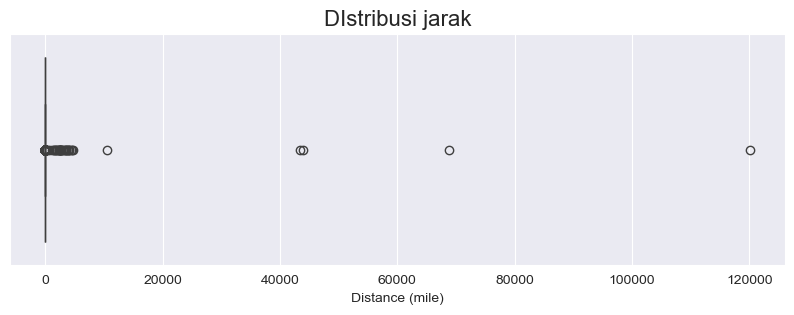

In [3452]:
plt.figure(figsize=(10, 3))

sns.boxplot(data=df, x='trip_distance')
plt.xlabel('Distance (mile)')
plt.title('DIstribusi jarak', fontsize=16)

plt.show()

Mengecek data tidak wajar menggunakan boxplot dari sini dapat dilihat jika terdapat data outliers.<br>
- Asumsi jika taxi menempuh kurang dari 0.62 mile (1 km), ada kemungkinan penumpang atau driver membatalkan pesanan

In [3453]:
len(df[df['trip_distance']<0.62])

6395

In [3454]:
#hanya pake data yang trip distancenya lebih dari 0.62 miles
df = df[df['trip_distance']>0.62]

In [3455]:
df['trip_distance'].value_counts().sum()

60838

mengidentifikasi perjalanan jarak jauh (dengan jarak lebih dari 50 mil) dan memeriksa detailnya

In [3456]:
df[df['trip_distance'] > 50].shape[0]

38

In [3457]:
df[df['trip_distance']>50][['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance', 'fare_amount']].sort_values(by='trip_distance', ascending=True).head()

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,fare_amount
7290,2023-01-05 09:00:03,2023-01-05 15:18:38,134,134,66.18,15.00
64521,2023-01-06 14:16:00,2023-01-06 14:59:00,82,130,137.95,44.90
66406,2023-01-20 09:16:00,2023-01-20 09:59:00,133,90,254.65,45.44
63821,2023-01-01 12:35:00,2023-01-01 12:58:00,181,137,579.63,28.49
64975,2023-01-10 15:40:00,2023-01-10 16:24:00,26,37,1082.45,49.80


Terdapat data yang jaraknya lebih dari 120 mil

In [3458]:
outliers = df[df['trip_distance']>50][['PULocationID', 'DOLocationID', 'trip_distance']].head()
outliers

,PULocationID,DOLocationID,trip_distance
7290,134,134,66.18
33263,82,236,1571.97
63821,181,137,579.63
64272,193,140,2555.47
64384,49,65,3077.89


- handle extereme outlers dengan median

In [3459]:
median_trip_distance = df['trip_distance'].median()

df['trip_distance'] = df['trip_distance'].apply(lambda x: median_trip_distance if x > 50 else x)

In [3460]:
df[df['trip_distance']>50][['PULocationID', 'DOLocationID', 'trip_distance','fare_amount']].shape[0]

0

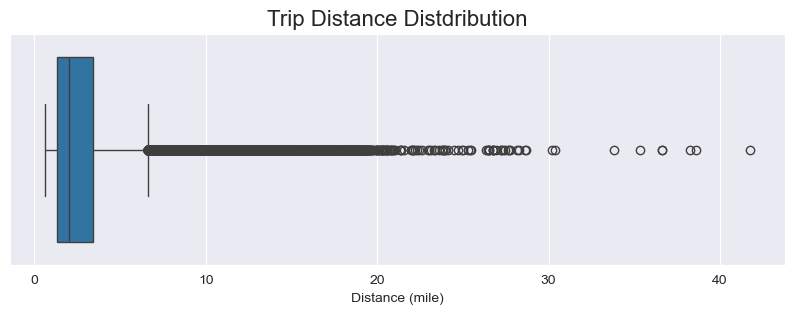

In [3461]:
plt.figure(figsize=(10, 3))

sns.boxplot(data=df, x='trip_distance')
plt.xlabel('Distance (mile)')
plt.title('Trip Distance Distdribution', fontsize=16)

plt.show()

Untuk mengatasi outliers biasa dengan merangkum data ke dalam kelompok-kelompok (kategori) berdasarkan rentang nilai tertentu.
Berdasarkan distribusi trip_distance, berikut adalah contoh pembagian rentang dalam miles:

- <2 miles : 0.6 - 2 miles (short inner-city trips)
- 3-6 miles : 3 - 6 miles (short-to-medium trips)
- 7-10 miles: 7 - 10 miles (medium trips, slightly longer distances)
- 11-20 miles: 11 - 20 miles (longer trips)
- '>20 miles' : 21 - 50 miles (exceptionally long trips)

dimana
- short inner-city trips: Perjalanan singkat dalam kota.
- short-to-medium trips: Jarak lebih umum untuk perjalanan ke/dari lokasi populer.
- medium trips, slightly longer distances: Perjalanan antarkota kecil atau jarak menengah dalam kota.
- longer trips: Biasanya perjalanan antardaerah di New York.
- exceptionally long trips: Perjalanan jarak jauh yang jarang terjadi.

In [3462]:
bins = [0, 2, 5, 10, 20, 50]
labels = ['<2 miles', '3-6 miles', '7-10 miles', '11-20 miles', '>20 miles']

df['distance_bins'] = pd.cut(df['trip_distance'], bins=bins, labels=labels)

In [3463]:
df['distance_bins'].value_counts(dropna=False)

distance_bins
<2 miles       29971
3-6 miles      22388
7-10 miles      6934
11-20 miles     1459
>20 miles         86
Name: count, dtype: int64

### **Buat kategori juga untuk time**
- Noon: 12:00 PM (midday)
- Midnight: 12:00 AM
- Morning: 12:01 AM to 11:59 AM
- Afternoon: 12:01 PM to 5:59 PM
- Evening: 6:00 PM to 8:59 PM
- Night: 9:00 PM to 11:59 PM

In [3464]:
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour

In [3465]:
time_bins = [0, 5, 12, 13, 18, 21, 24] 
time_labels = ['Midnight', 'Morning', 'Noon','Afternoon', 'Evening', 'Night']
df['pickup_hour'] = pd.cut(df['lpep_pickup_datetime'].dt.hour, bins=time_bins, labels=time_labels, right=False)

In [3466]:
df['pickup_hour'].value_counts()

pickup_hour
Afternoon    21402
Morning      16167
Evening      11553
Night         5221
Noon          3336
Midnight      3159
Name: count, dtype: int64

### **Tambah kolom durasi**

In [3467]:
duration_diff = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds()/60
df['trip_duration'] = np.round(duration_diff, 2)

Cek data outliers dari durasi

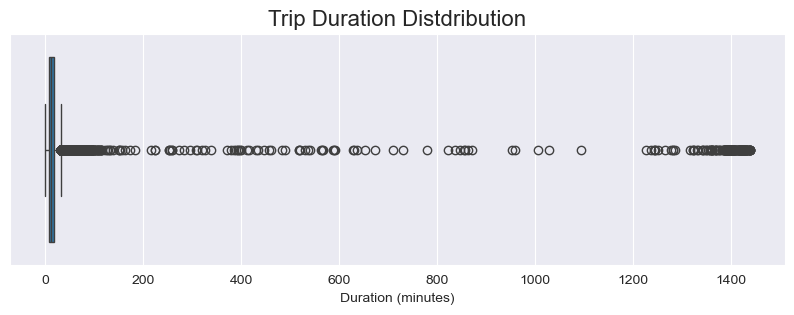

In [3468]:
plt.figure(figsize=(10, 3))

sns.boxplot(data=df, x='trip_duration')
plt.xlabel('Duration (minutes)')
plt.title('Trip Duration Distdribution', fontsize=16)


plt.show()

cek data yang waktu tempuhnya 1-3 menit, kemukinan taxi yang menempuh jarak tersebut tidak wajar. Data tsb akan di drop.

In [3469]:
len(df[df['trip_duration']<=3])

458

In [3470]:
df.shape[0]

60838

In [3471]:
df = df[df['trip_duration']>3]

In [3472]:
df.shape[0]

60380

Cek extereme outliers

In [3473]:
pd.set_option('display.max_columns', None)
df[df['trip_distance']==df['trip_distance'].max()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,PUBorough,PUZone,PUservice_zone,DOLocationID,DOBorough,DOZone,DOservice_zone,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_kategori,distance_bins,pickup_hour,trip_duration
8034,2,2023-01-05 14:53:00,2023-01-05 16:19:20,N,1,130,Queens,Jamaica,Boro Zone,1,EWR,Newark Airport,EWR,1,41.74,114.0,0.0,0.5,0.0,18.3,0.3,133.1,1,1,0.0,Weekdays,>20 miles,Afternoon,86.33


Jika jaraknya mencapai 41,74 mil dan ditempuh dengan kecepatan rata-rata terendah di Kota New York, yaitu 10 mph, maka waktu yang dibutuhkan sekitar 4,17 jam atau sekitar 250 menit. Dengan demikian, durasi perjalanan yang lebih dari 250 menit bisa dianggap sebagai data yang tidak wajar.

In [3474]:
outliers = df[df['trip_duration']>250][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']]
print('Total outliers : ', len(outliers))
outliers.head()

Total outliers :  225


,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 23:18:32,1375.47
108,260,223,2023-01-01 01:53:59,2023-01-02 00:00:00,1326.02
118,129,37,2023-01-01 01:25:46,2023-01-02 00:29:15,1383.48
207,129,129,2023-01-01 03:12:42,2023-01-02 02:03:43,1371.02
262,65,37,2023-01-01 04:03:36,2023-01-02 03:31:50,1408.23


In [3475]:
# Menghitung median trip_duration untuk setiap kombinasi PULocationID dan DOLocationID
median_trip_duration = df['trip_duration'].median()

df['trip_duration'] = df['trip_duration'].apply(lambda x: median_trip_duration if x > 250 else x)

In [3476]:
outliers = df[df['trip_duration'] > 250][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']]

In [3477]:
len(outliers)

0

In [3478]:
df['trip_duration'].isna().sum()

0

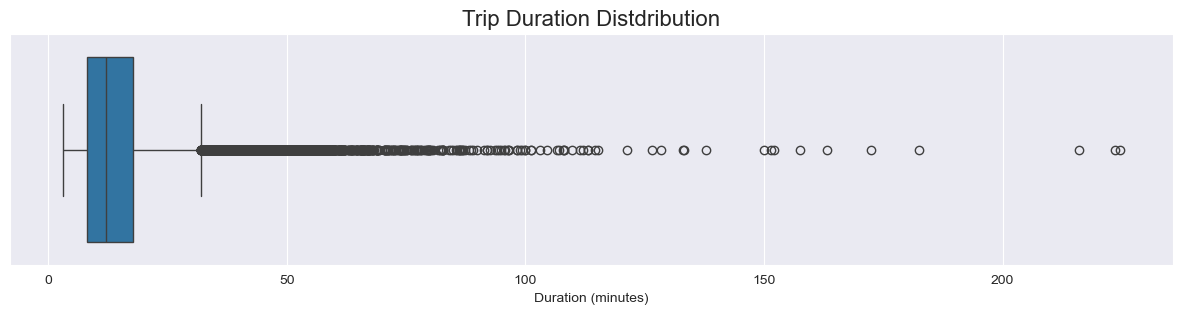

In [3479]:
plt.figure(figsize=(15, 3))

sns.set_style("darkgrid")

sns.boxplot(data=df, x='trip_duration')
plt.xlabel('Duration (minutes)')
plt.title('Trip Duration Distdribution', fontsize=16)

plt.show()

Handle outliers bisa dengan membuat kategori

In [3480]:
bins_duration = [0, 10, 20, 30, np.inf] 
labels_duration = ['<10 minutes', '11-20 minutes', '21-30 minutes', '>30 minutes']

df['duration_bins'] = pd.cut(df['trip_duration'], bins=bins_duration, labels=labels_duration)

In [3481]:
df['duration_bins'].value_counts()

duration_bins
11-20 minutes    26138
<10 minutes      22930
21-30 minutes     7683
>30 minutes       3629
Name: count, dtype: int64

### **Buat Kolom Disctionary**

In [3482]:
#payment_type dictionary
payment_mapping = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

In [3483]:
df['payment_type_dics'] = df['payment_type'].map(payment_mapping)

In [3484]:
df['payment_type_dics'].value_counts()

payment_type_dics
Credit card    40073
Cash           19759
Unknown          433
No charge         96
Dispute           19
Name: count, dtype: int64

In [3485]:
#trip_type dictionary
df['trip_type_dics'] = df['trip_type'].map({1:'Street-hail', 2:'Dispatch'})
df['trip_type_dics'].value_counts()

trip_type_dics
Street-hail    59830
Dispatch         550
Name: count, dtype: int64

In [3486]:
#Ratecode ID Dictionary
ratecode_mapping = {
    1: "Standard rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negotiated fare",
    6: "Group ride"
}

In [3488]:
df['RatecodeID_dics'] = df['RatecodeID'].map(ratecode_mapping)

### Drop kolom

In [3489]:
#drop kolom yang tidak terpakai untuk analisis
df = df.drop(['VendorID','PUservice_zone','DOservice_zone','store_and_fwd_flag'], axis=1)

# **4. Exploratory Data Analysis (EDA)**

In [3490]:
df.describe()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
count,60380,60380,60380.000000,60380.000000,60380.000000,60380.000000,60380.000000,60380.000000,60380.000000,60380.000000,60380.000000,60380.000000,60380.000000,60380.000000,60380.000000,60380.000000,60380.000000
mean,2023-01-16 22:26:49.173351936,2023-01-16 22:45:24.892745984,1.044435,97.346125,139.876035,2.921208,16.858741,0.869754,0.578445,2.283258,0.159135,0.958451,22.300291,1.360053,1.009109,0.937384,14.327181
min,2023-01-01 00:01:31,2023-01-01 00:13:26,1.000000,3.000000,1.000000,0.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.020000
25%,2023-01-09 12:22:10,2023-01-09 12:39:09.750000128,1.000000,74.000000,74.000000,1.340000,10.000000,0.000000,0.500000,0.000000,0.000000,1.000000,13.750000,1.000000,1.000000,0.000000,8.080000
50%,2023-01-17 09:06:23.500000,2023-01-17 09:23:34.500000,1.000000,75.000000,140.000000,2.050000,13.500000,0.000000,0.500000,2.000000,0.000000,1.000000,18.500000,1.000000,1.000000,0.000000,11.980000
75%,2023-01-24 15:55:35,2023-01-24 16:14:46.500000,1.000000,116.000000,223.000000,3.460000,19.800000,1.000000,0.500000,3.540000,0.000000,1.000000,26.560000,2.000000,1.000000,2.750000,17.650000
max,2023-01-31 23:58:23,2023-02-01 17:27:05,5.000000,263.000000,263.000000,41.740000,348.100000,7.500000,1.500000,222.220000,36.050000,1.000000,349.600000,5.000000,2.000000,2.750000,224.550000
std,NaN,NaN,0.411815,59.690244,76.050549,2.651429,11.136127,1.296292,0.359944,3.004720,1.036095,0.166167,13.401998,0.567048,0.095006,1.303449,9.658729


Tipe data yang dapat digunakan di heatmap adalah tipe data int64, float64, dan category

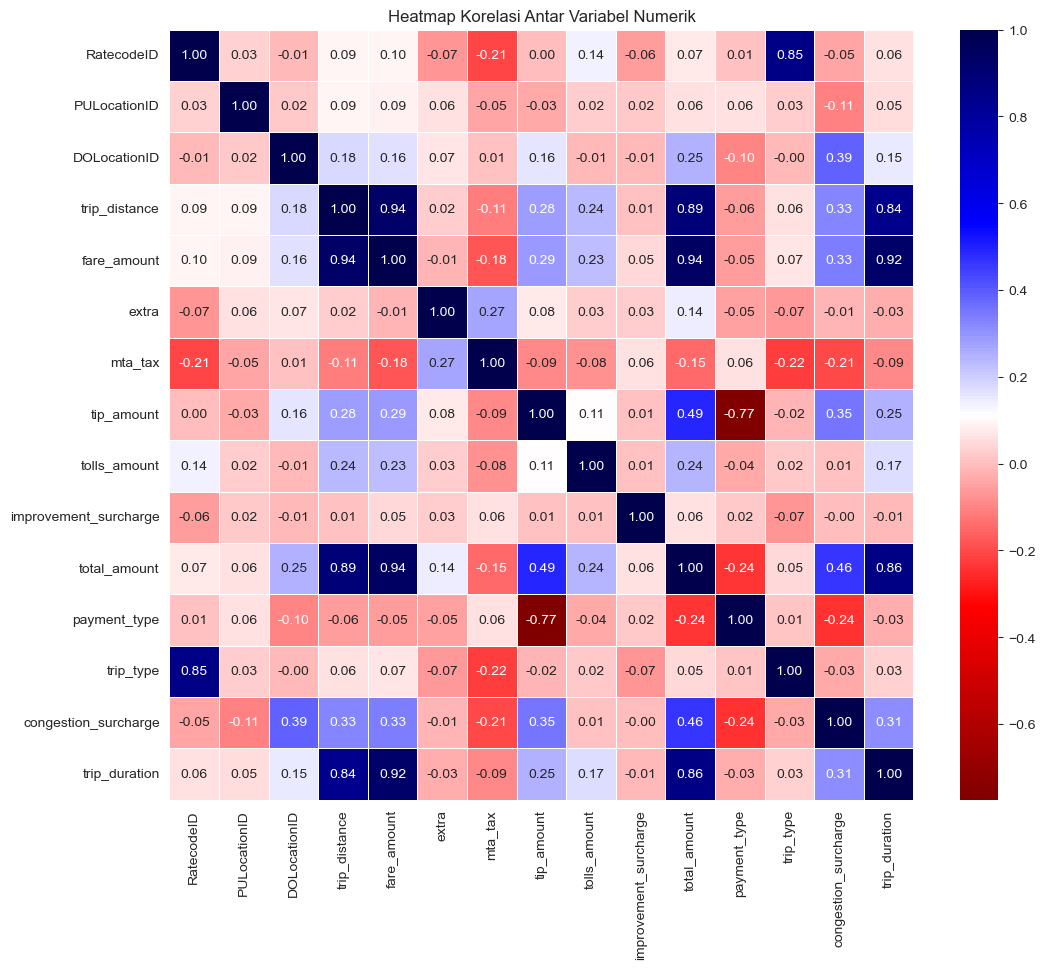

In [3491]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr(method='spearman')

# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic_r', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

### **Hubungan Fare Amount dan Trip Distance**

Dari heatmap dapat dilihat bahwa fare_amount dan trip_distance memilkili nilai 0.94 berarti berarti ada korelasi positif yang sangat kuat antara dua variabel. Nilai positif menunjukkan bahwa ketika trip_distance meningkat, fare_amount juga meningkat, dan sebaliknya. Ini menunjukkan bahwa fare_amount sangat dipengaruhi oleh trip_distance.

Namun untuk memastikan validitas data maka akan diperiksa apakah ada outlier yang mungkin memengaruhi korelasi tsb.

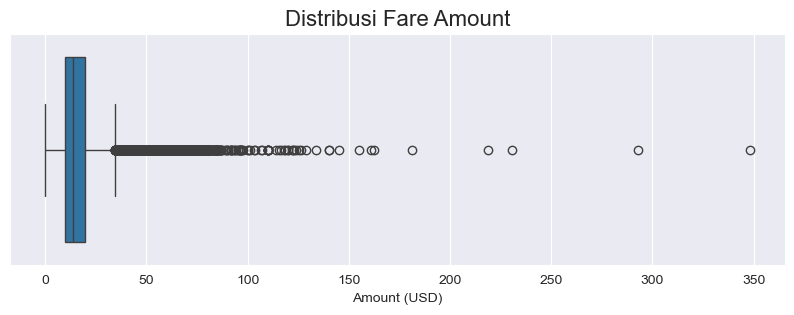

In [3496]:
#lihat distribusi Fare amount
plt.figure(figsize=(10, 3))

sns.boxplot(data=df, x='fare_amount')
plt.xlabel('Amount (USD)')
plt.title('Distribusi Fare Amount', fontsize=16)

plt.show()

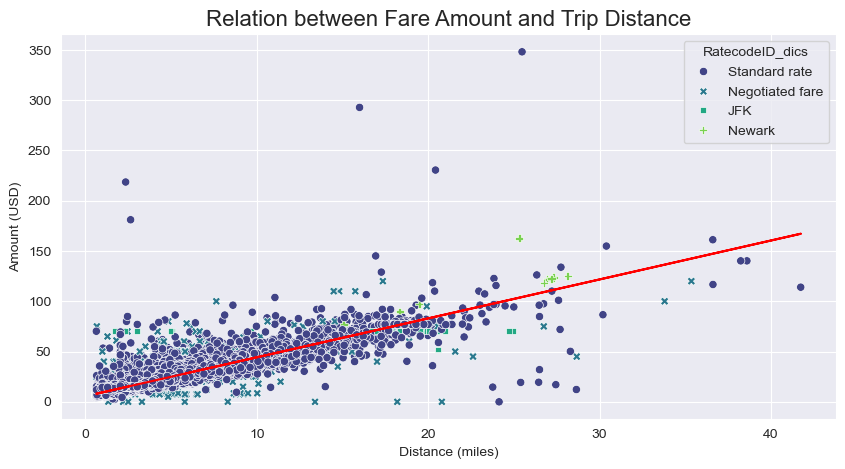

In [3497]:
plt.figure(figsize=(10, 5))

sns.scatterplot(df, x='trip_distance', y='fare_amount',  hue='RatecodeID_dics',style='RatecodeID_dics', palette='viridis')
plt.xlabel('Distance (miles)')
plt.ylabel('Amount (USD)')
plt.title('Relation between Fare Amount and Trip Distance', fontsize=16)

x, y = df['trip_distance'], df['fare_amount'] 
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c='red')

plt.show()

C:\Users\Fitri A\AppData\Local\Temp\ipykernel_13012\906953530.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_13012\906953530.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_13012\906953530.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_13012\906953530.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

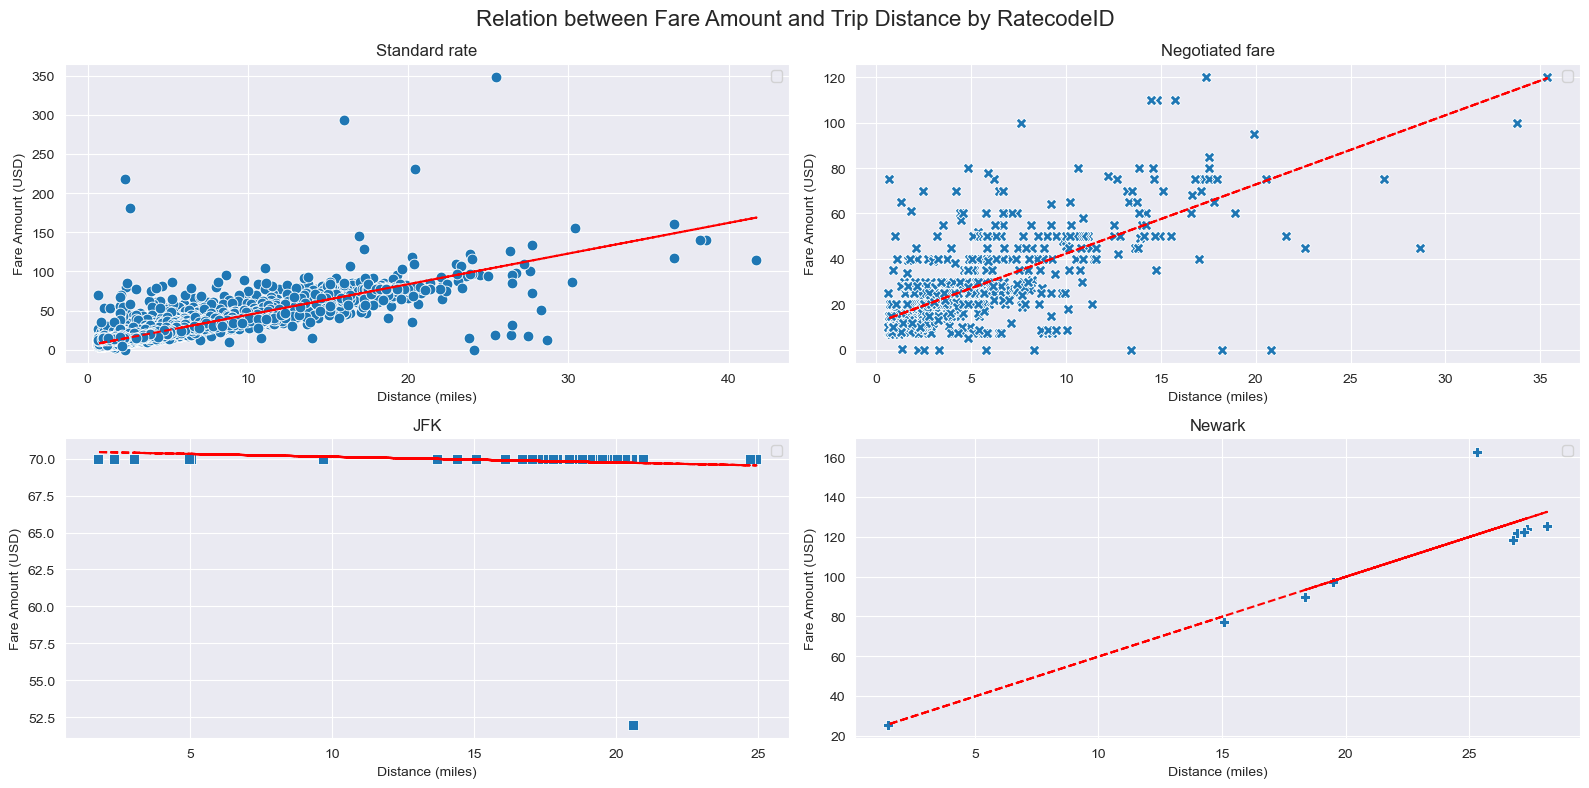

In [3498]:
plt.figure(figsize=(16, 8))
plt.suptitle('Relation between Fare Amount and Trip Distance by RatecodeID', fontsize=16)

markers = ['o', 'X', 's', 'P']

for i, category in enumerate(df['RatecodeID_dics'].unique()):
    # Filter data for the current category
    subset = df[df['RatecodeID_dics'] == category]
    x = subset['trip_distance']
    y = subset['fare_amount']
    
    plt.subplot(2, 2, i + 1)
    
    sns.scatterplot(x=x, y=y, marker=markers[i], s=60)
    plt.title(category, fontsize=12)
    plt.xlabel('Distance (miles)', fontsize=10)
    plt.ylabel('Fare Amount (USD)', fontsize=10)
    
    if category == 'JFK Airport':
        plt.axhline(y=70, color='red', linestyle='--', label='Flat Fare ($70)')
        plt.legend()
    else:
        m, b = np.polyfit(x, y, 1) 
        plt.plot(x, m * x + b, color='red', linestyle='--')
        plt.legend()

plt.tight_layout()
plt.show()

### **Distribusi Tip**

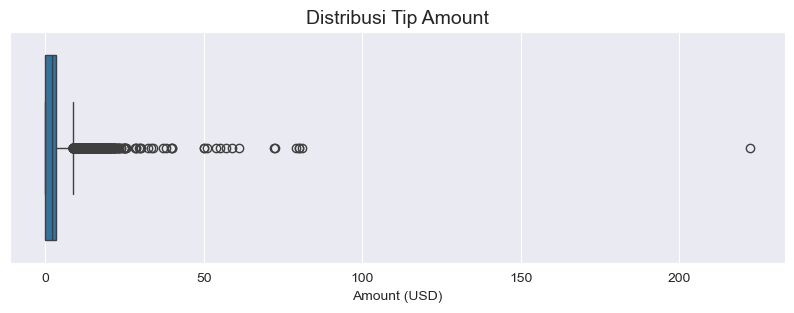

In [3499]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x='tip_amount')
plt.xlabel('Amount (USD)')
plt.title('Distribusi Tip Amount', fontsize=14)
plt.show()

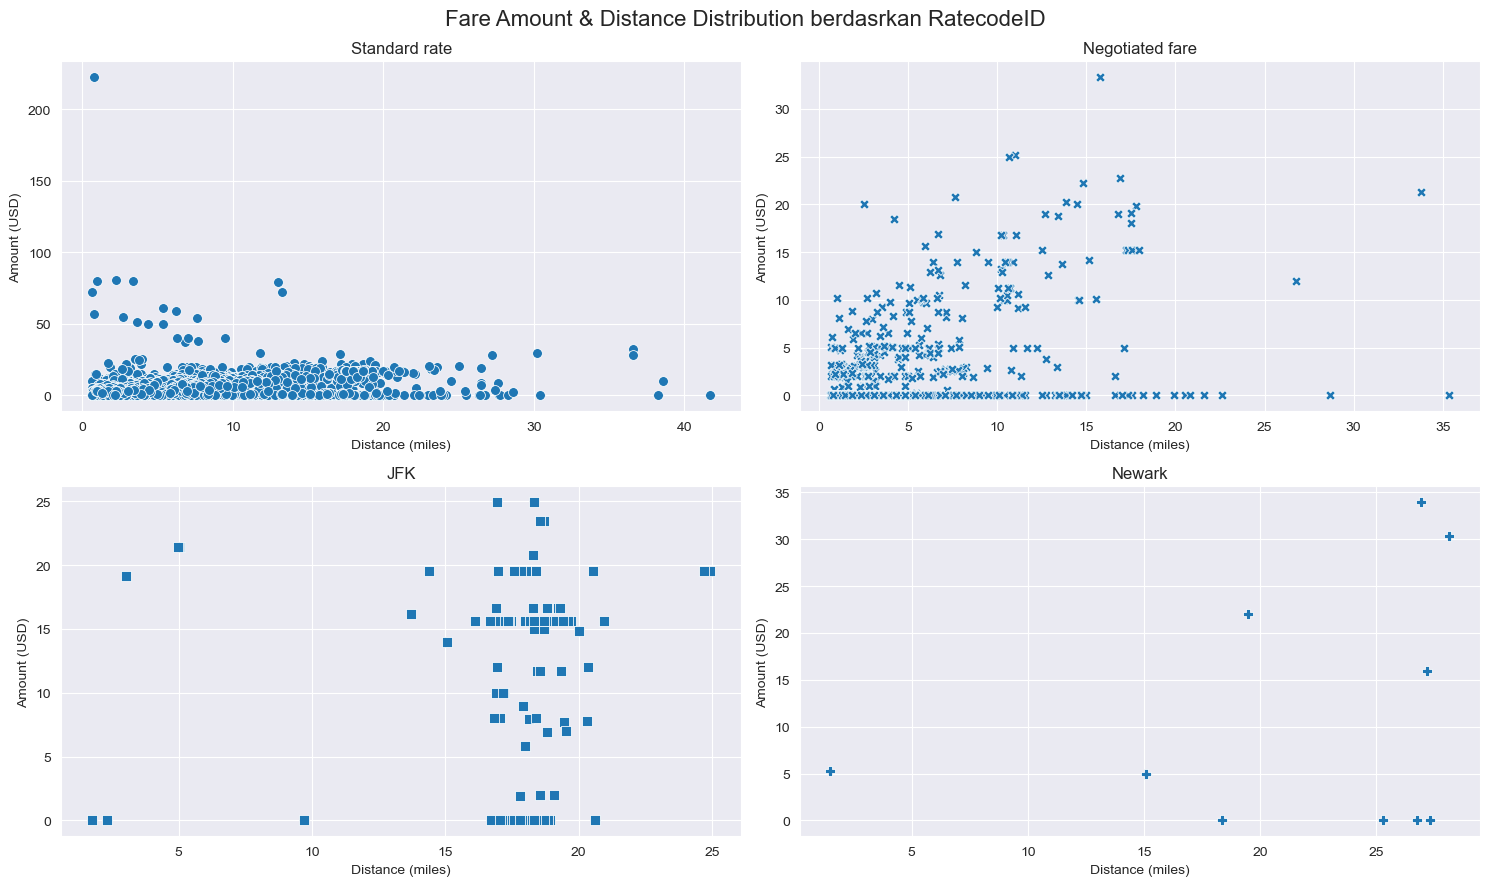

In [3500]:
plt.figure(figsize=(15, 9))
plt.suptitle('Fare Amount & Distance Distribution berdasrkan RatecodeID', fontsize=16)

markers=['o','X','s','P']

for i, x in enumerate(df['RatecodeID_dics'].unique()):
    plt.subplot(2,2,i+1)
    sns.scatterplot( df[df['RatecodeID_dics'] == x], x='trip_distance', y='tip_amount',  marker=markers[i], s=50)
    plt.title(x)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')

plt.tight_layout()
plt.show()

- Tidak ada hubungan antara tip dan distance pada semua kategori RatecodeID

In [3501]:
df['tip_amount'].describe()

count    60380.000000
mean         2.283258
std          3.004720
min          0.000000
25%          0.000000
50%          2.000000
75%          3.540000
max        222.220000
Name: tip_amount, dtype: float64

In [3502]:
outliers = df[df['tip_amount']>200][['RatecodeID_dics', 'distance_bins', 'tip_amount']]
outliers

,RatecodeID_dics,distance_bins,tip_amount
50452,Standard rate,<2 miles,222.22


Terlihat bahwa maksimal tip yang diberikan adalah 200 USD sehingga kita tinjau lebih lanjut dari jarak dari sini daapat disimpulkan bahwa data tidak wajar, sehingga akan di-drop.

In [3503]:
df= df.drop(outliers.index)

In [3504]:
outliers = df[df['tip_amount']>200][['RatecodeID_dics', 'distance_bins', 'tip_amount']]
outliers

,RatecodeID_dics,distance_bins,tip_amount


In [3505]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,PUBorough,PUZone,DOLocationID,DOBorough,DOZone,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_kategori,distance_bins,pickup_hour,trip_duration,duration_bins,payment_type_dics,trip_type_dics,RatecodeID_dics
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1,1,2.75,Weekend,3-6 miles,Midnight,11.02,11-20 minutes,Credit card,Street-hail,Standard rate
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,Manhattan,Bloomingdale,43,Manhattan,Central Park,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1,1,0.00,Weekend,<2 miles,Midnight,6.77,<10 minutes,Credit card,Street-hail,Standard rate
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1,41,Manhattan,Central Harlem,238,Manhattan,Upper West Side North,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1,1,0.00,Weekend,<2 miles,Midnight,5.82,<10 minutes,Credit card,Street-hail,Standard rate
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1,41,Manhattan,Central Harlem,74,Manhattan,East Harlem North,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1,1,0.00,Weekend,<2 miles,Midnight,5.97,<10 minutes,Credit card,Street-hail,Standard rate
5,2023-01-01 00:53:31,2023-01-01 01:11:04,1,41,Manhattan,Central Harlem,262,Manhattan,Yorkville East,1,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2,1,2.75,Weekend,3-6 miles,Midnight,17.55,11-20 minutes,Cash,Street-hail,Standard rate


Dari boxplot dapat dilihat bahwa pada data tip extereme outliers dimulai dari 50 USD

In [3506]:
outliers2 = df[df['tip_amount']>=50][['RatecodeID_dics','trip_distance', 'distance_bins', 'fare_amount', 'total_amount','tip_amount']]
outliers2

,RatecodeID_dics,trip_distance,distance_bins,fare_amount,total_amount,tip_amount
297,Standard rate,7.63,7-10 miles,33.8,98.60,54.00
16401,Standard rate,3.38,3-6 miles,26.1,110.10,80.00
19390,Standard rate,13.25,11-20 miles,56.2,130.70,72.00
20609,Standard rate,0.67,<2 miles,8.6,82.65,72.55
24893,Standard rate,5.38,7-10 miles,26.8,89.30,61.00
31575,Standard rate,13.01,11-20 miles,49.2,130.70,79.00
32877,Standard rate,3.65,3-6 miles,25.4,80.40,51.00
34243,Standard rate,4.36,3-6 miles,45.7,99.95,50.00
38543,Standard rate,2.26,3-6 miles,14.2,96.58,80.88
40768,Standard rate,0.98,<2 miles,7.2,88.70,80.00


Di USA, tip biasanya berkisar antara 10% hingga 20% dari fare amount. Dari data di atas tip yang diberikan terlalu tinggi jika dibandingkan dengan fare amount  sehingga data akan di drop.

In [3507]:
df= df[df['tip_amount']<50]

In [3508]:
outliers2 = df[df['tip_amount']>=50][['RatecodeID_dics','trip_distance', 'distance_bins', 'fare_amount', 'total_amount','tip_amount']].shape[0]
outliers2

0

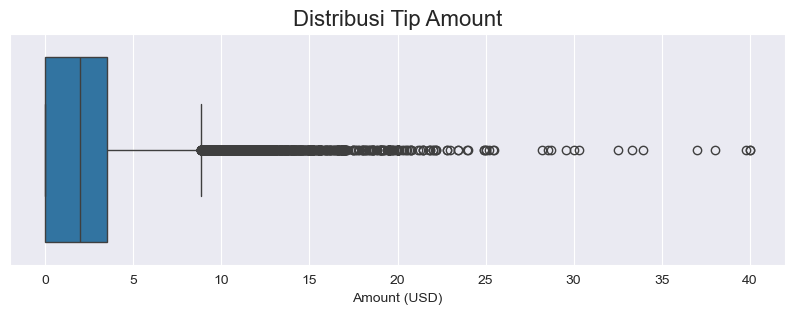

In [3509]:
plt.figure(figsize=(10, 3))

sns.boxplot(data=df, x='tip_amount')
plt.xlabel('Amount (USD)')
plt.title('Distribusi Tip Amount', fontsize=16)

plt.show()

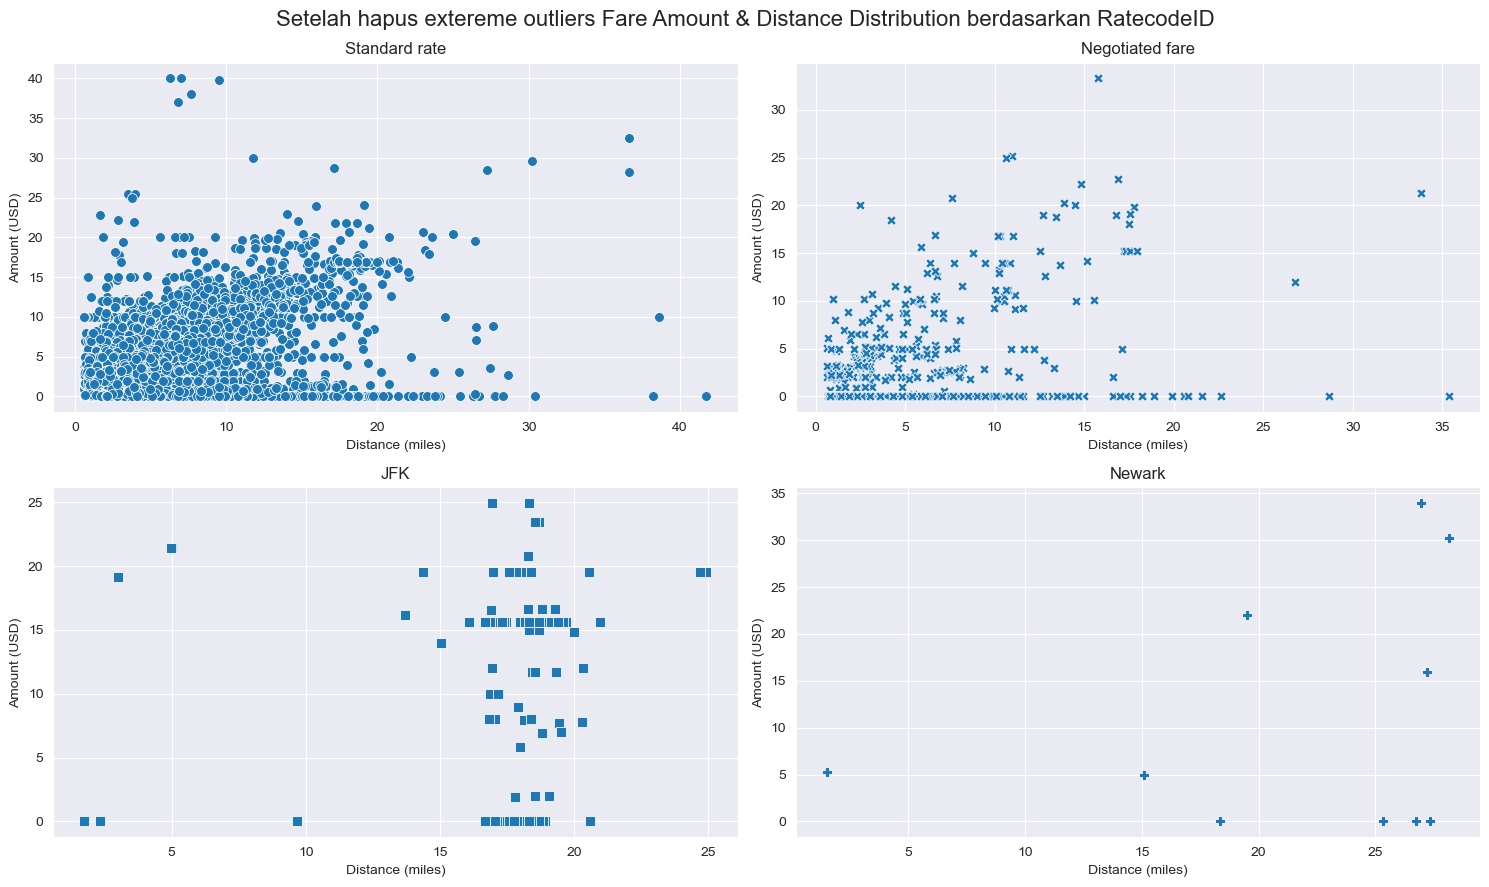

In [3510]:
plt.figure(figsize=(15, 9))
plt.suptitle('Setelah hapus extereme outliers Fare Amount & Distance Distribution berdasarkan RatecodeID', fontsize=16)

markers=['o','X','s','P']

for i, x in enumerate(df['RatecodeID_dics'].unique()):
    plt.subplot(2,2,i+1)
    sns.scatterplot( df[df['RatecodeID_dics'] == x], x='trip_distance', y='tip_amount',  marker=markers[i], s=50)
    plt.title(x)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')

plt.tight_layout()
plt.show()

Membuat kategori untuk handle sisa outlier

In [3511]:
df['tip_amount'].describe()

count    60365.000000
mean         2.265213
std          2.702163
min          0.000000
25%          0.000000
50%          2.000000
75%          3.530000
max         40.000000
Name: tip_amount, dtype: float64

In [3512]:
import pandas as pd
import numpy as np


bins_tip = [-np.inf, 0, 5, 10, 15, np.inf]
labels_tip = ['0$', '1-5$', '6-10$', '11-15$', '>15$']
df['tip_amount_bins'] = pd.cut(df['tip_amount'], bins=bins_tip, labels=labels_tip)


In [3513]:
df['tip_amount_bins'].value_counts()

tip_amount_bins
1-5$      29641
0$        23532
6-10$      6191
11-15$      743
>15$        258
Name: count, dtype: int64

In [3514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60365 entries, 0 to 68036
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   60365 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  60365 non-null  datetime64[ns]
 2   RatecodeID             60365 non-null  int64         
 3   PULocationID           60365 non-null  int64         
 4   PUBorough              60365 non-null  category      
 5   PUZone                 60365 non-null  category      
 6   DOLocationID           60365 non-null  int64         
 7   DOBorough              60365 non-null  category      
 8   DOZone                 60365 non-null  category      
 9   passenger_count        60365 non-null  object        
 10  trip_distance          60365 non-null  float64       
 11  fare_amount            60365 non-null  float64       
 12  extra                  60365 non-null  float64       
 13  mta_ta

In [3523]:
#atur ulang susunan kolom
column_order = [
    'lpep_pickup_datetime','pickup_hour', 'lpep_dropoff_datetime','passenger_count', 'trip_duration', 'duration_bins','trip_distance', 
    'RatecodeID', 'RatecodeID_dics','PULocationID', 'DOLocationID', 'PUBorough',  'DOBorough', 'PUZone', 'DOZone', 'payment_type', 'payment_type_dics', 
    'trip_type', 'trip_type_dics',
    'day_kategori', 'distance_bins',
    'fare_amount', 'tip_amount','tip_amount_bins', 'extra', 'mta_tax',   'tolls_amount',
    'improvement_surcharge', 'congestion_surcharge','total_amount',
]


In [3524]:
df = df[column_order]

In [ ]:
#df.to_csv('NYC_TLC_Clean3.csv', index=False) --> simpan databersih

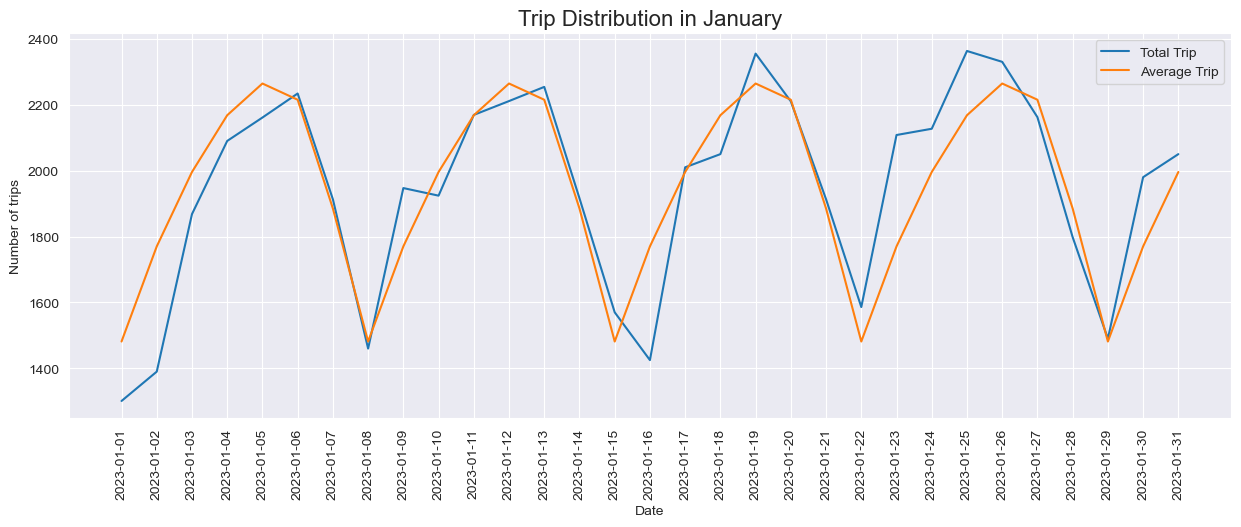

In [3528]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

sns.lineplot(data=trip_merge,
             x='lpep_pickup_datetime', 
             y='trip_bydate', 
             label = 'Total Trip')

sns.lineplot(data=trip_merge,
             x='lpep_pickup_datetime', 
             y='avg_trip',
             label = 'Average Trip')

plt.title('Trip Distribution in January', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of trips')
plt.xticks(trip_monthly['lpep_pickup_datetime'], rotation=90)

plt.show()